# Substance - Jupyter Theme

## Input / Output

In [1]:
# This sample notebook uses the following packages. Please make sure they're installed before running.
import time
import sys
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Last updated: %s' %time.strftime('%d/%m/%Y'))
print(sys.version)

Last updated: 19/03/2018
2.7.14 |Anaconda, Inc.| (default, Oct  5 2017, 02:28:52) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Color Palette

Inspired by [Material Designs color palette](https://material.io/guidelines/style/color.html#color-color-palette)

<ul style="list-style: none; padding-left: 0;">
  <li style="width:75px; text-align: center; display:inline-block; width:20%;">
    <div style="width:75px; height:75px; border-radius:50%; margin: 0 auto 10px; background-color: #2196F3;"></div>
    #2196F3
  </li><li style="width:75px; text-align: center; display:inline-block; width:20%;">
    <div style="width:75px; height:75px; border-radius:50%; margin: 0 auto 10px; background-color: #F44336;"></div>
    #F44336
  </li><li style="width:75px; text-align: center; display:inline-block; width:20%;">
    <div style="width:75px; height:75px; border-radius:50%; margin: 0 auto 10px; background-color: #9C27B0;"></div>
    #9C27B0
  </li><li style="width:75px; text-align: center; display:inline-block; width:20%;">
    <div style="width:75px; height:75px; border-radius:50%; margin: 0 auto 10px; background-color: #4CAF50;"></div>
    #4CAF50
  </li><li style="width:75px; text-align: center; display:inline-block; width:20%;">
    <div style="width:75px; height:75px; border-radius:50%; margin: 0 auto 10px; background-color: #FFEB3B;"></div>
    #FFEB3B
  </li>
</ul>

## Fonts

* [Roboto](https://fonts.google.com/specimen/Roboto)
* [Roboto Mono](https://fonts.google.com/specimen/Roboto+Mono)

> Roboto is a neo-grotesque sans-serif typeface family developed by Google as the system font for its mobile operating system Android. 
Google describes the font as "modern, yet approachable" and "emotional".The entire font family has been licensed under the Apache license[3] and was officially made available for free download on January 12, 2012, on the newly launched Android Design website. It belongs to the neo-grotesque genre of sans-serif typefaces, and includes Thin, Light, Regular, Medium, Bold and Black weights with matching oblique styles. It also includes condensed styles in Light, Regular and Bold, also with matching oblique designs.

> On June 25, 2014, Matias Duarte announced at Google I/O that the typeface for Roboto was significantly redesigned for Android 5.0 "Lollipop". The most significant changes are seen in the glyphs are: B (shrinking), R, P, a (expanding space), D, O, C, Q, e, g (curving), k, and numbers: 1, 5, 6, 7, and 9. Punctuation marks and the tittles in the lowercase i and j have been changed from a square dot to a rounded dot.

![Roboto](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Roboto_%28typeface%29.svg/440px-Roboto_%28typeface%29.svg.png)

# Code Sample

In [2]:
"""
Contributed by izanbf1803.
Example:
-------------------------------------------------------------------------------------------------
    Code:
        |   exp = "2452 * (3 * 6.5 + 1) * 6 / 235"
        |   print("Expression:", exp)
        |   print("Parsed expression:", mp.parse(exp))
        |   print("Evaluation result:", mp.evaluate(exp))
    Output:
        |   Expression: 2452 * (3 * 6 + 1) * 6 / 235
        |   Parsed expression: ['2452', '*', '(', '3', '*', '6', '+', '1', ')', '*', '6', '/', '235']
        |   Evaluation result: 1189.4808510638297
-------------------------------------------------------------------------------------------------
"""

from collections import deque
import re

numeric_value = re.compile('\d+(\.\d+)?')

__operators__ = "+-/*"
__parenthesis__ = "()"
__priority__ = {
    '+': 0,
    '-': 0,
    '*': 1,
    '/': 1,
}

def is_operator(token):
    """
    Check if token it's a operator
    token Char: Token
    """
    return token in __operators__

def higher_priority(op1, op2):
    """
    Check if op1 have higher priority than op2
    op1 Char: Operation Token 1
    op2 Char: Operation Token 2
    """
    return __priority__[op1] >= __priority__[op2]

def calc(n2, n1, operator):
    """
    Calculate operation result
    n2 Number: Number 2
    n1 Number: Number 1
    operator Char: Operation to calculate
    """
    if operator == '-': return n1 - n2
    elif operator == '+': return n1 + n2
    elif operator == '*': return n1 * n2
    elif operator == '/': return n1 / n2
    return 0

def apply_operation(op_stack, out_stack):
    """
    Apply operation to the first 2 items of the output queue
    op_stack Deque (reference)
    out_stack Deque (reference)
    """
    out_stack.append(calc(out_stack.pop(), out_stack.pop(), op_stack.pop()))

def parse(expression):
    """
    Return array of parsed tokens in the expression
    expression String: Math expression to parse in infix notation
    """
    result = []
    current = ""
    for i in expression:
        if i.isdigit() or i == '.':
            current += i
        else:
            if len(current) > 0:
                result.append(current)
                current = ""
            if i != ' ':
                result.append(i)
    if len(current) > 0:
        result.append(current)
    return result

def evaluate(expression):
    """
    Calculate result of expression
    expression String: The expression
    type Type (optional): Number type [int, float]
    """
    op_stack  = deque() # operator stack
    out_stack = deque() # output stack (values)
    for token in parse(expression):
        if numeric_value.match(token):
            out_stack.append(float(token))
        elif token == '(':
            op_stack.append(token)
        elif token == ')':
            while len(op_stack) > 0 and op_stack[-1] != '(':
                apply_operation(op_stack, out_stack)
            op_stack.pop() # Remove remaining '('
        else: # is_operator(token)
            while len(op_stack) > 0 and is_operator(op_stack[-1]) and higher_priority(op_stack[-1], token):
                apply_operation(op_stack, out_stack)
            op_stack.append(token)

    while len(op_stack) > 0:
        apply_operation(op_stack, out_stack)

    return out_stack[-1] 

# Markdown

## Text

It's very easy to make some words **bold** and other words *italic* with Markdown. You can even [link to Google!](http://google.com)

## Lists

Sometimes you want numbered lists:

1. One
2. Two
3. Three

Sometimes you want bullet points:

* Start a line with a star
* Profit!

Alternatively,

- Dashes work just as well
- And if you have sub points, put two spaces before the dash or star:
  - Like this
  - And this
  
## Images

If you want to embed images, this is how you do it:

![Image of Yaktocat](https://octodex.github.com/images/yaktocat.png)

## Headers & Quotes

# Structured documents

Sometimes it's useful to have different levels of headings to structure your documents. Start lines with a `#` to create headings. Multiple `##` in a row denote smaller heading sizes.

### This is a third-tier heading

You can use one `#` all the way up to `######` six for different heading sizes.

If you'd like to quote someone, use the > character before the line:

> Coffee. The finest organic suspension ever devised... I beat the Borg with it.
> - Captain Janeway

## Code

There are many different ways to style code with GitHub's markdown. If you have inline code blocks, wrap them in backticks: `var example = true`.  If you've got a longer block of code, you can indent with four spaces:

    if (isAwesome){
      return true
    }

GitHub also supports something called code fencing, which allows for multiple lines without indentation:

```
if (isAwesome){
  return true
}
```

And if you'd like to use syntax highlighting, include the language:

```javascript
if (isAwesome){
  return true
}
```

## Tables

| k  | Accuracy       | Precision      | Recall         |
| -- | -------------- | :------------- | -------------- |
| 6  | 0.867063492063 | 0.5625         | 0.469047619048 |
| 7  | 0.860119047619 | 0.520833333333 | 0.469047619048 |
| 8  | 0.874206349206 | 0.495833333333 | 0.519047619048 |
| 9  | 0.867261904762 | 0.458333333333 | 0.519047619048 | 
| 10 | 0.867261904762 | 0.458333333333 | 0.519047619048 | 
| 11 | 0.853373015873 | 0.391666666667 | 0.385714285714 | 
| 12 | 0.853373015873 | 0.4125         | 0.469047619048 |
| 13 | 0.839484126984 | 0.35           | 0.385714285714 |

# MathJax Equations

$x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$


$\frac{d^2w}{dx^2} - \frac{4u^2w}{l^2}
   = \frac{-qlx}{2D}+\frac{qx^2}{2D}$


$\frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)$
      
In more mathematical terms, our goal is to compute the best fit to *n* points $(x_i, y_i)$ with $i=1,2,...n,$ via linear equation of the form  
$f(x) = a\cdot x + b$.  

$(\nabla_X Y)^k = X^i (\nabla_i Y)^k = X^i \left( \frac{\partial Y^k}{\partial x^i} + \Gamma_{im}^k Y^m \right)$


We further have to assume that the y-component is  functionally dependent on the x-component.  
In a cartesian coordinate system, $b$ is the intercept of the straight line with the y-axis, and $a$ is the slope of this line.

In order to obtain the parameters for the linear regression line for a set of multiple points, we can re-write the problem as matrix equation  
$\pmb X \; \pmb a = \pmb y$

$\Rightarrow\Bigg[ \begin{array}{cc}
x_1 & 1  \\
... & 1 \\
x_n & 1  \end{array} \Bigg]$
$\bigg[ \begin{array}{c}
a  \\
b \end{array} \bigg]$
$=\Bigg[ \begin{array}{c}
y_1   \\
...  \\
y_n  \end{array} \Bigg]$

With a little bit of calculus, we can rearrange the term in order to obtain the parameter vector $\pmb a = [a\;b]^T$

$\Rightarrow \pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

The more classic approach to obtain the slope parameter $a$ and y-axis intercept $b$ would be:

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)

$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

where 

$S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad$ (covariance)

$\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$ (variance)

# Dataframes

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Plotting and Visualization

In [6]:
plt.rcdefaults()
plt.style.use('/Users/tom/Projects/jupyter-substance/substance.mplstyle')

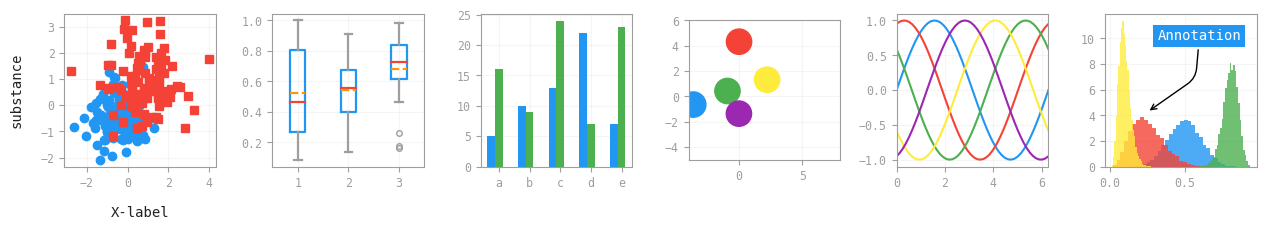

In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25), xycoords='data',
                xytext=(0.9, 0.9), textcoords='axes fraction',
                va="top", ha="right",
                color="w",
                bbox=dict(boxstyle="square", fc="#2196F3", ec="None"),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax

def plot_boxplot(ax, prng):
    # Fixing random state for reproducibility    
    X = prng.random_sample(20)
    Y = prng.random_sample(20)
    Z = prng.random_sample(20)
    ax.boxplot([X,Y,Z])
    return ax

def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    #plot_image_and_patch(axes[1], prng)
    plot_boxplot(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig

# Setup a list of all available styles, in alphabetical order but
# the `default` and `classic` ones, which will be forced resp. in
# first and second position.
fig = plot_figure(style_label='substance')
plt.show()

# Errors and Exceptions

In [8]:
import thislibrarydoesnotexist

ImportError: No module named thislibrarydoesnotexist

In [9]:
undef = 1/0

ZeroDivisionError: integer division or modulo by zero

# Credits

* Forked from [Spinzero](https://github.com/neilpanchal/spinzero-jupyter-theme)
* Some of the maths material is taken from notebooks by [Sebastian Raschka](http://www.sebastianraschka.com)
* Dataframe sample is taken from [How to convert a Scikit-learn dataset to a Pandas dataset?
](https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset)
* Code sample is from https://github.com/keon/algorithms/blob/master/calculator/math_parser.py
* Matplot examples taken from [matplotlib.org]( https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py)
* Markdown examples from [Github](https://guides.github.com/features/mastering-markdown/)